In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.datasets import fetch_openml

In [52]:
df = fetch_openml("mtp", version=1)
df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


In [53]:
df.target.head()

0    0.000000
1    0.017173
2    0.035667
3    0.043593
4    0.044914
Name: oz203, dtype: float64

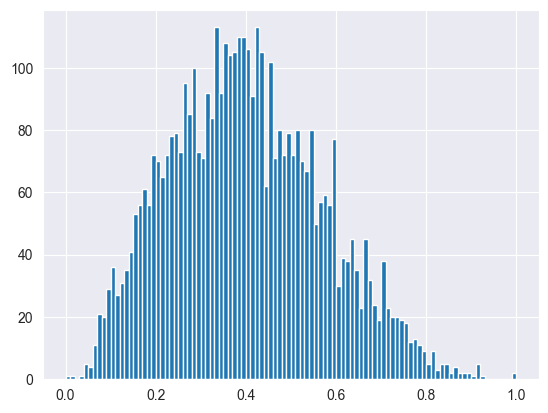

In [54]:
plt.hist(df.target, 100)
_ = plt.plot()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [57]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)

LinearRegression()

In [58]:
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340774906142

In [59]:
y_pred = baseline.predict(X_test)

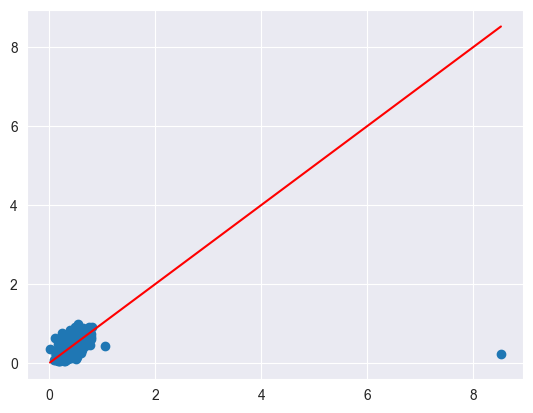

In [60]:
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

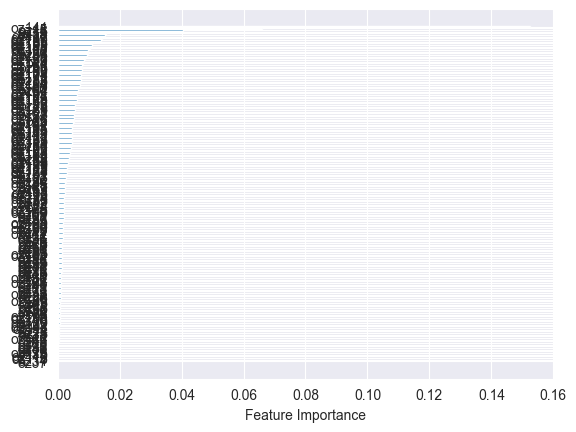

In [63]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [64]:
rf.feature_importances_[sort][-10:]

array([0.01167611, 0.0140417 , 0.01428119, 0.01492672, 0.01523774,
       0.01565008, 0.02840204, 0.04049074, 0.06602612, 0.15245376])

In [65]:
df.data.columns[sort][-10:]

Index(['oz155', 'oz197', 'oz180', 'oz137', 'oz112', 'oz18', 'oz35', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [66]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz157,oz146,oz201,oz58,oz20,oz162,oz117,oz158,oz198,oz109,oz155,oz197,oz180,oz137,oz112,oz18,oz35,oz48,oz15,oz141
0,0.000000,0.011997,0.127564,0.000,0.000000,0.319206,0.000000,0.800120,0.039213,0.076923,0.752291,0.505899,0.002655,0.000000,0.000000,0.0625,0.0,0.312855,0.000000,0.041308
1,0.000281,0.025932,0.475618,0.000,0.242424,0.306084,0.311793,0.791224,0.326584,0.153846,0.745984,0.683820,0.002581,0.278945,0.222222,0.0625,0.4,0.297041,0.282828,0.212274
2,0.001852,0.007666,0.497968,0.125,0.388889,0.406309,0.000000,0.798276,0.204885,0.076923,0.753298,0.499219,0.002722,0.000000,0.000000,0.1250,0.0,0.288557,0.388889,0.063643
3,0.000158,0.021463,0.134458,0.000,0.095238,0.327848,0.000000,0.800965,0.023469,0.076923,0.767469,0.630533,0.002473,0.039437,0.000000,0.0000,0.1,0.310692,0.111111,0.031193
4,0.000037,0.006780,0.295913,0.125,0.260870,0.329857,0.000000,0.802893,0.111398,0.076923,0.741548,0.516053,0.002810,0.000000,0.000000,0.0625,0.0,0.286581,0.304348,0.063643


In [67]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

In [68]:
better = LinearRegression()
better.fit(X_train, y_train)

LinearRegression()

In [69]:
print(bl_score)
better.score(X_test, y_test)

-1.6511340774906142


0.381100437436122

In [70]:
y_pred = better.predict(X_test)

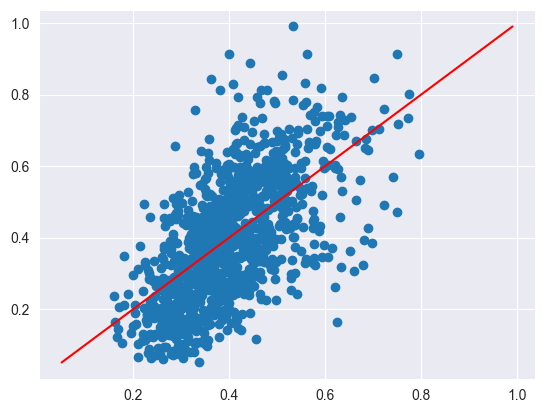

In [71]:
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

In [72]:
df = fetch_openml("balance-scale", version=1)

In [73]:
df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


<Axes: xlabel='class', ylabel='Count'>

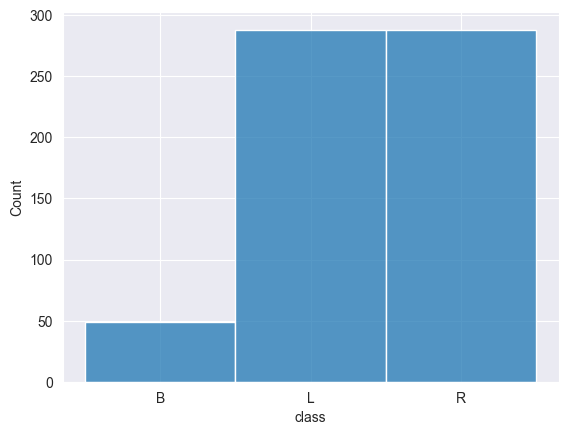

In [74]:
sns.histplot(df.target)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

<Axes: xlabel='class', ylabel='Count'>

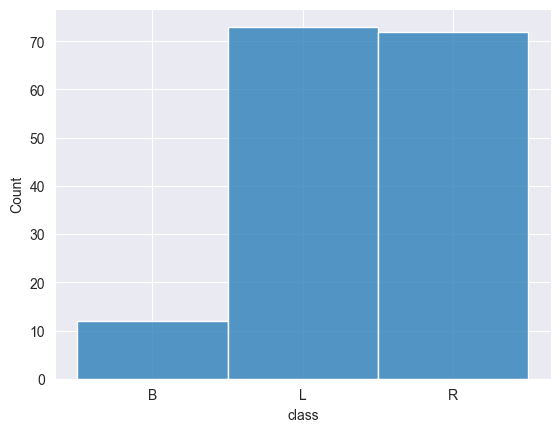

In [76]:
sns.histplot(y_test)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
baseline = LogisticRegression()
baseline.fit(X_train, y_train)

LogisticRegression()

In [79]:
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



Фактически, модель вообще ни разу не распознала правильно объект миноритарного класса. Поэтому невзвешенная оценка качества модели на самом деле ближе к отметке в 60%. Это не очень удовлетворительный результат.

In [82]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [83]:
from sklearn.utils.class_weight import compute_class_weight

In [84]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [85]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [86]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [87]:
print(confusion_matrix(y_test, weighted.predict(X_test)))

[[11  0  1]
 [ 4 67  2]
 [ 3  2 67]]


In [88]:
y_train.value_counts()

class
R    216
L    215
B     37
Name: count, dtype: int64

In [89]:
X_train["target"] = y_train

In [90]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [91]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [92]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [93]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [99]:
df = fetch_openml("CPMP-2015-regression", version=1)
X = df.data.drop(["instance_id"], axis=1)
X = pd.get_dummies(X)
X.head()

,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


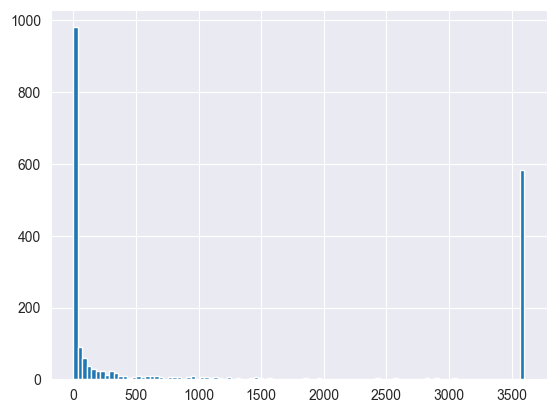

In [100]:
plt.hist(df.target, 100)
_ = plt.plot()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [102]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))